In [5]:
import pandas as pd
import os, pathlib, math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from import_clean import *
from calculate import *
from itertools import combinations
from tqdm.notebook import tqdm

In [2]:
all_data = cleanup_all(import_all_data("utla"), remove_geography_code=False)

c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts009-utla.csv not found in data/census2021-ts009
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts012-utla.csv not found in data/census2021-ts012
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts013-utla.csv not found in data/census2021-ts013
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts022-utla.csv not found in data/census2021-ts022
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021

In [3]:
coefficients = pd.DataFrame(columns=['variable1', 'variable2', 'coefficient'])
keys = list(all_data.keys())
keys.remove("TS006")
keys.remove("TS008")
keys.remove("TS020")
keys.remove("TS041")

In [37]:
nonstandard = pd.DataFrame(columns=['Code', 'Count'])
for dfCode in list(all_data.keys()):
    if len([column for column in list(all_data[dfCode].columns) if "Total" in column]) != 1:
        nonstandard = pd.concat([nonstandard, pd.DataFrame({'Code': dfCode, 'Count': len([column for column in list(all_data[dfCode].columns) if "Total" in column])}, index=[0])])
nonstandard

,Code,Count
0,TS006,0
0,TS008,0
0,TS020,0
0,TS041,0


In [10]:
length = math.factorial(len(keys)) / (math.factorial(2) * math.factorial(len(keys) - 2))
for k1, k2 in tqdm(combinations(keys, 2), total=length):
    dataframes = [all_data[k1], all_data[k2]]
    columns = [[column for column in df.columns if column != "geography code" and "Total" not in column] for df in dataframes]
    totals = [[column for column in df.columns if "Total" in column][0] for df in dataframes]
    #fig, ax = plt.subplots(len(columns[0]), len(columns[1]), figsize=(10*len(columns[0]), 5*len(columns[1])))
    df_merged = dataframes[0].merge(dataframes[1], on="geography code")
    for column_set, total in zip(columns, totals):
        df_merged[column_set] = df_merged[column_set].divide(df_merged[total], axis=0)
    for i, column1 in enumerate(columns[0]):
        for j, column2 in enumerate(columns[1]):
            x, y = df_merged[column1], df_merged[column2]
            pearsons = np.corrcoef(np.array(x), np.array(y))[0][1]
            coefficients = pd.concat([coefficients, pd.DataFrame({"variable1": column1, "variable2": column2, "coefficient": pearsons}, index=[0])])
            #sns.scatterplot(df_merged, x=x, y=y, ax=ax[i, j]).set(title=f"{column1} vs {column2} (Pearson's: {pearsons})")


  0%|          | 0/1326.0 [00:00<?, ?it/s]

c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\t

ValueError: cannot reindex on an axis with duplicate labels

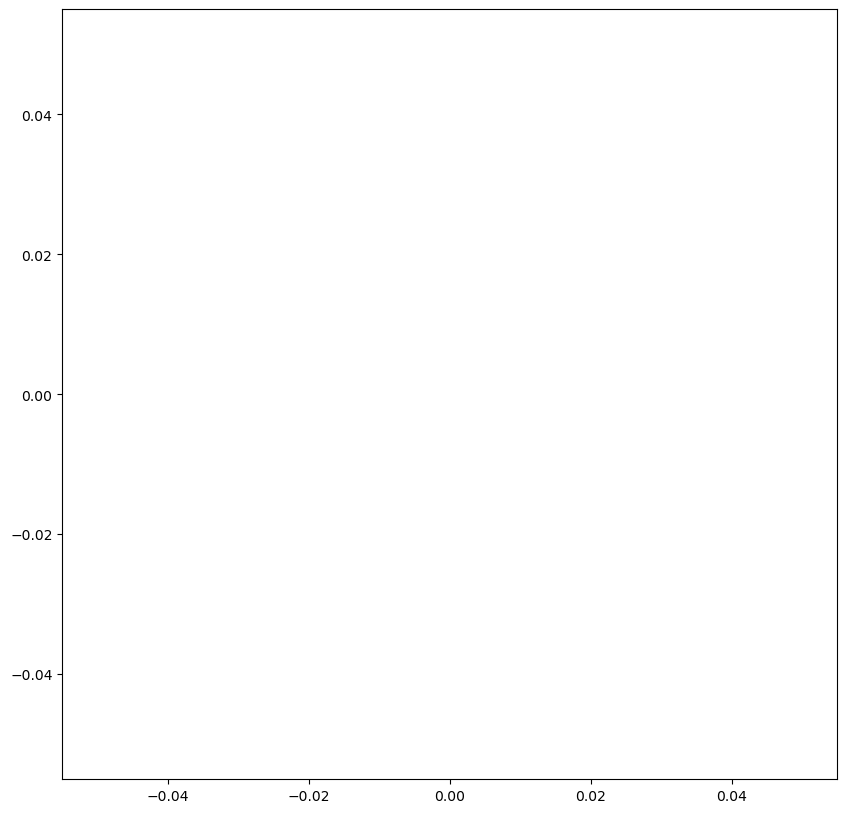

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=coefficients, x='coefficient', ax=ax, bins=50, stat='density', kde=True)